## Handling Missing Data 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import scipy 
from pathlib import Path


Creating functions that we will work with

* read_dataset
* plot_dfs
* calculate RMSE score

In [2]:
# Function: read_dataset 
def read_dataset(folder, file, date_col=None):
    """
    folder: is a Path object 
    file: the CSV filename
    date_col: specify a date_col to ues for index_col 

    returns: a pandas DataFrame with a DatetimeIndex 
    """

    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    
    return df 

def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None): 
    """ 
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data 
    """
    df_missing = df2.rename(columns={col: 'missing'})

    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 

    df1[col].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)

    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    
    plt.show()

def rmse_score(df1, df2, col=None):
    """ 
    df1: original dataframe without mising data
    df2: dataframe with missing data 
    col: column name that contains missing data 
    returns: a list of scores
    """

    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]: 
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores 

#### Understanding missing data 

* In this chapter we will use the RMSE to evaluate the different imputation techniques


##### Performing data quality checks 
* Missing data - values not captured or observed in the dataset 
 - when ingesting the data using pandas, missing values will show up as either Nan, NaT or NA
  

In [3]:
# Reading data 
co2 = Path('../TimeSeriesAnalysisWithPythonCookbook/Data/co2_missing.csv')
ecom = Path('../TimeSeriesAnalysisWithPythonCookbook/Data/clicks_missing.csv')

In [4]:
co2_df = pd.read_csv(co2, index_col='year', parse_dates=True)
ecom_df = pd.read_csv(ecom, index_col='date', parse_dates=True)

In [5]:
# To count the number of missing values in both DataFrames, we can use the DataFrame.isnull()
# - this will return True (if missing) or False (if not missing) for each value! 

#Try - Booleans 
isinstance(True, int)
int(True)

1

In [6]:
# Get the total number of missing values for each DataFrame 
#co2_df.isna().sum()

ecom_df.isnull().sum()

price        0
location     0
clicks      16
dtype: int64

* Notice: .isna() and .isnull() can be used interchangeably - this means that they are are an alias of each other! 
* form the results co2 has 25 missing values from the co2 column
* ecom_df has 19 missing values in total (3 from date, 1 from price, 1 from location, 14 from clicks)

In [7]:
# To get the grand total for the entire ecom_df DataFrame, just chain another .sum() function to the end of the statement
ecom_df.isnull().sum().sum()

16

In [8]:
co2_df[190:195]

,co2
year,
1985-01-01,NaN
1986-01-01,NaN
1987-01-01,NaN
1988-01-01,4.2953
1989-01-01,4.2782


In [9]:
# Check whether the DataFrame contains any missing values 
ecom_df.isnull().values.any()
co2_df.isnull().values.any()

True

In [10]:
# Use DataFrame.info() to display the schema, total records, columns names, columns dtypes, count of non-missing values per columnn, index dtype and the DataFrame's total memory usage:
ecom_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2008-04-01 to 2008-08-13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     135 non-null    float64
 1   location  135 non-null    int64  
 2   clicks    119 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.2 KB


In [11]:
# To get the summary statistics for a DataFame, use the DataFrame.describe() method
co2_df.describe(include='all', datetime_is_numeric=True)


,co2
count,201.000000
mean,1.590015
std,1.644182
min,0.000000
25%,0.076400
50%,0.935100
75%,2.807600
max,4.907900


In [12]:
ecom_df.describe(include='all', datetime_is_numeric=True) 

,price,location,clicks
count,135.000000,135.000000,119.000000
mean,43.478978,1.696296,9530.336134
std,0.608467,1.114853,4687.587507
min,42.207018,1.000000,2044.000000
25%,43.045714,1.000000,6438.000000
50%,43.487069,1.000000,8391.000000
75%,43.886875,2.000000,11363.500000
max,45.801613,5.000000,29505.000000


In [13]:
# Convert the 0 and ? values to NaN types. This can be accomplished using the DataFrame.replace() method
co2_df.replace(0, np.NaN, inplace=True)


In [14]:
ecom_df.replace('?', np.NaN, inplace=True) 


In [15]:
ecom_df['clicks'] = ecom_df['clicks'].astype('float')
ecom_df

,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0
...,...,...,...
2008-08-09,44.182033,1,6716.0
2008-08-10,43.608260,1,9523.0
2008-08-11,43.553363,1,8881.0


In [16]:
# Convert 0 and ? values to NaN types. This can be accomplished using the DataFrame.replace() method:

#co2_df.replace(0, np.NaN, inplace=True)
#ecom_df.replace('?', np.NaN, inplace=True)
ecom_df['click'] = ecom_df['clicks'].astype('float')


In [17]:
co2_df.isnull().sum()

co2    35
dtype: int64

In [18]:
# If we know that the data will always contain a NaN value (like '?') which should be converted to NaN (or any other value), the we can utilize the pd.read_csv() function and update the na_values parameter
pd.read_csv(ecom, parse_dates=['date'], na_values={'?'})

# - this will replace all instance of '?' with NaN

,date,price,location,clicks
0,2008-04-01,43.155647,2,18784.0
1,2008-04-02,43.079056,1,24738.0
2,2008-04-03,43.842609,2,15209.0
3,2008-04-04,43.312376,1,14018.0
4,2008-04-05,43.941176,1,11974.0
...,...,...,...,...
130,2008-08-09,44.182033,1,6716.0
131,2008-08-10,43.608260,1,9523.0
132,2008-08-11,43.553363,1,8881.0
133,2008-08-12,44.500469,1,7272.0


## Handling Missing data with Univariate imputation using Pandas 

There are generally two approaches to imputing missing values: 
* univariate imputation 
* multivariate imputation 

Some basic univariate imputation techniques include the following: 
* Imputing using the _mean_ 
* Imputing using the last observation forward (**forward fill**). This can be referred to as **Last Observation Carried Forward (LOCF)**
* Imputing using the next observation backward (**backward fill**). This can be referred to as Next Observation Carried Backward (NOCB)



In [19]:
# Read in the datasets

folder = Path('../TimeSeriesAnalysisWithPythonCookbook/Data/')

co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

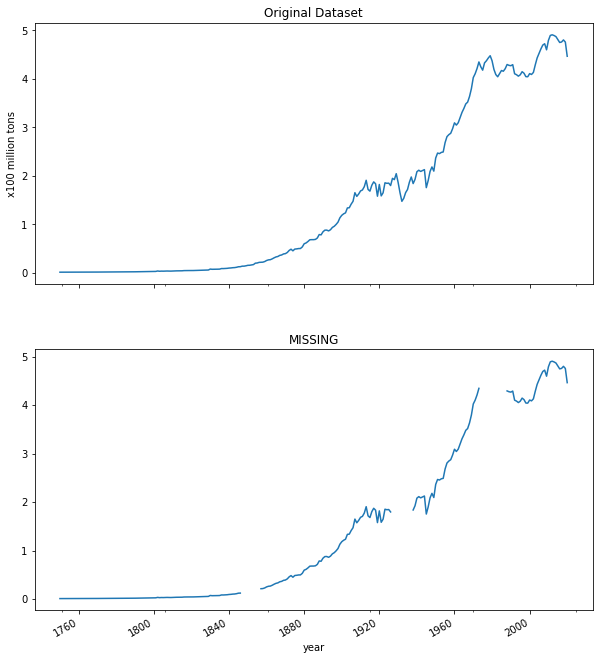

In [20]:
# Visualize the CO2 DataFrames (original and missing) and specify the column with missing values (co2)

plot_dfs(co2_original, co2_missing, 'co2', title="Annual CO2 Emission per Capita", xlabel="Years", ylabel="x100 million tons")


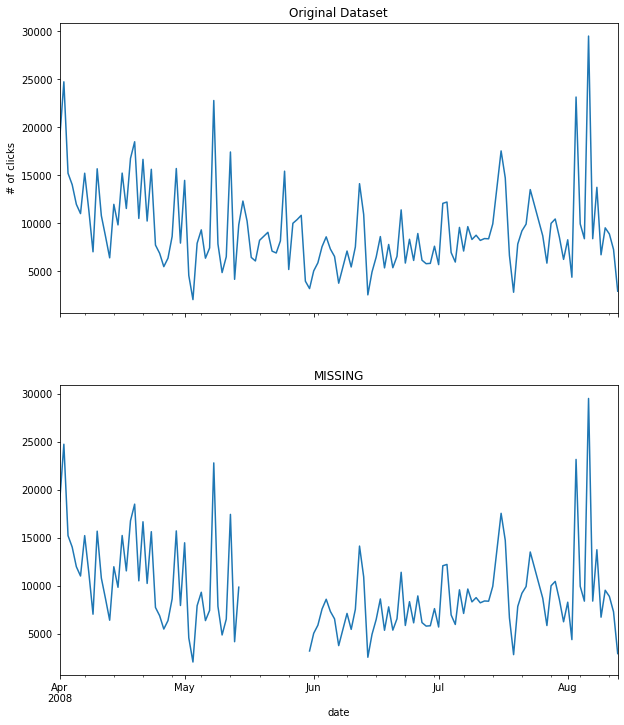

In [21]:
# Now visualize the clickstream DataFrames:

plot_dfs(clicks_original, clicks_missing, 'clicks', title="Page Clicks per Day", xlabel='date', ylabel="# of clicks")


In [22]:
# confirm the period of missing data 
clicks_missing[clicks_missing['clicks'].isna()]


,price,location,clicks
date,,,
2008-05-15,42.517755,2,NaN
2008-05-16,44.011009,2,NaN
2008-05-17,42.530303,2,NaN
2008-05-18,42.565698,5,NaN
2008-05-19,43.892996,2,NaN
2008-05-20,43.247706,2,NaN
2008-05-21,44.106289,1,NaN
2008-05-22,43.810714,1,NaN
2008-05-23,43.620802,1,NaN


Imputation 

* fillna() - has a value parameter that takes either a numeric or a string value to substitute for all the NaN instances!
* Instead of using the value parameter, .fillna() has a method parameter that can take specific string values such as ffill for forward fill, or bfill for backward fill 
 

In [23]:
# Now, we can perform our first imputation 
co2_missing['ffill'] = co2_missing['co2'].fillna(method='ffill')
co2_missing['bfill'] = co2_missing['co2'].fillna(method='bfill')
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())


In [24]:
# Use the rmse_score function to get the scores:

_ = rmse_score(co2_original, co2_missing, 'co2')


RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


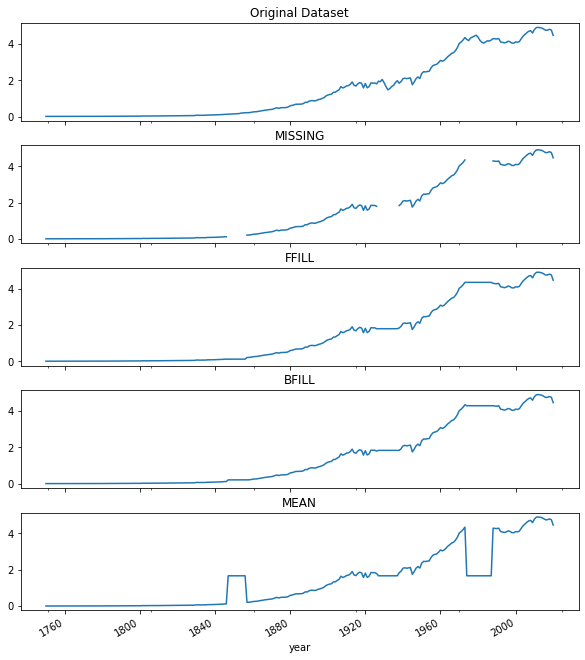

In [25]:
# Visualize the results 
plot_dfs(co2_original, co2_missing, 'co2')

In [26]:
# Let's do the same for the Clickstream DataFrame: 

clicks_missing['ffill'] = clicks_missing['clicks'].fillna(method='ffill')
clicks_missing['bfill'] = clicks_missing['clicks'].fillna(method='bfill')
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

In [27]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for ffill: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


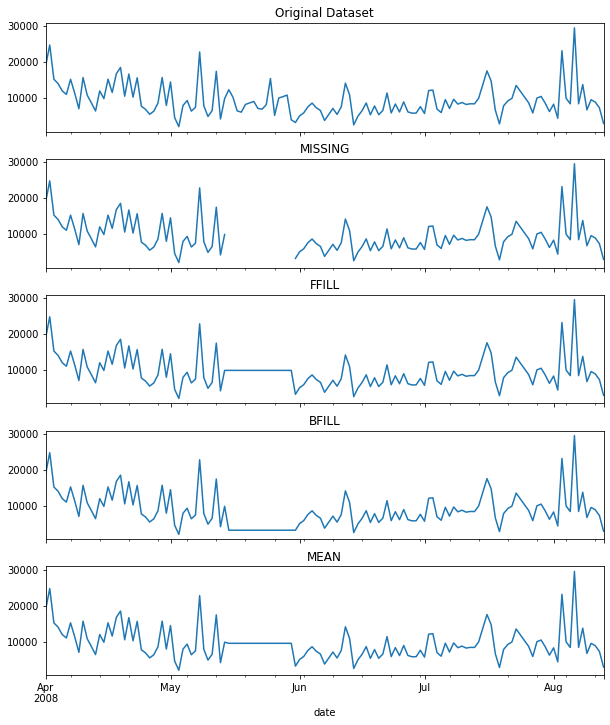

In [28]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

#### Conclusion: 

From the above we can see that imputing the two different datasets gives us very different results, by using the different methods. Therefore we must conclude that, there is no "one-size-fits-all" strategy when it comes to handling missing data. Instead, each dataset requires a different strategy. Therefore, we should always inspect our results and align the outputs with the expectations based on the nature of our data! 

In [29]:
# With Pandas DF, we can use shortcuts for ffill and bfill 
co2_missing['co2'].ffill()
co2_missing['co2'].bfill()

year
1750-01-01    0.0125
1760-01-01    0.0128
1770-01-01    0.0150
1780-01-01    0.0169
1790-01-01    0.0206
               ...  
2016-01-01    4.7496
2017-01-01    4.7595
2018-01-01    4.8022
2019-01-01    4.7582
2020-01-01    4.4654
Name: co2, Length: 226, dtype: float64

#### Handling missing data with univariate imputation using scikit-learn

In [30]:
# Using the SimpleImputer class from the scikit-learn library 
from sklearn.impute import SimpleImputer

# folder = Path('../TimeSeriesAnalysisWithPythonCookbook/Data/')

# co2_original = read_dataset(folder, 'co2_original.csv', 'year')

In [44]:
# SimpleImputer accepts different values for the strategy parameter, including mean, median, and most_frequent 

strategy = [('Mean Strategy', 'mean'), ('Median Strategy', 'median'), ('Most Frequent Strategy', 'most_frequent')]

# SimpleImputer has a fit_transform method. It combines two steps into one: fitting to the data (.fit), and then transforming the data (.transform)

# SimpleImputer accepts a NumPy array, so we will need to use the Series.values property followed by the .reshape(-1,1) method to create a 2D NumPy array
# Simply what this is doing is transforming the 1D array from .values of shape (226, ) to a 2D array of shape (226, 1) which is a column vector! 

co2_vals = co2_missing['co2'].values.reshape(-1,1) 
clicks_vals = clicks_missing['clicks'].values.reshape(-1,1)
for s_name, s in strategy: 
    co2_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(co2_vals))
    clicks_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(clicks_vals))
     
# Now, both the clicks_missing and co2_missing DataFrames have three additional columns, one for each of the imputation strategies implemented


In [31]:
# Using the rmse_score function, we can now evaluate each strategy. Start with the CO2 data. We should get an output like the following: 
_ = rmse_score(co2_original, co2_missing, 'co2')


RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


In [32]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for ffill: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


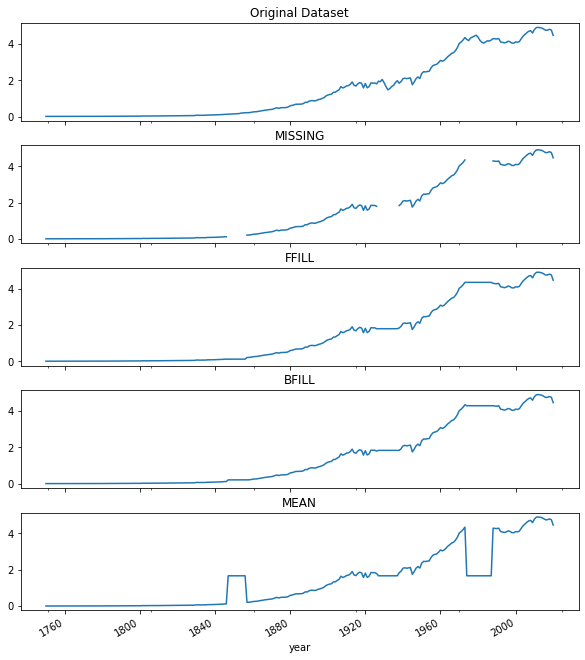

In [33]:
# Notice how the RMSE strategy rankings vary between the two datasets. For example, the mean strategy performend best on the CO2 data, while the Median strategy did best on the Clickstream data

# Finally use the plot_dfs function to plot the results. Start with the CO2 dataset: 
plot_dfs(co2_original, co2_missing, 'co2')


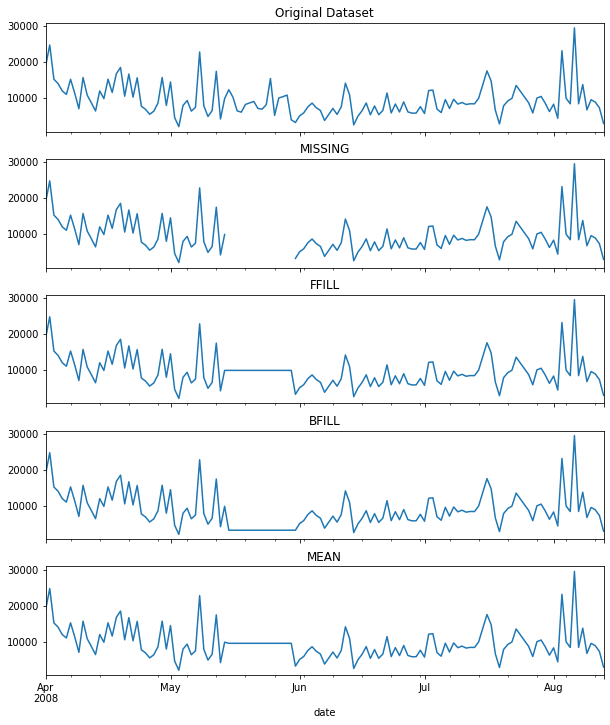

In [34]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

SimpleImputer provides basic strategies that may be suitable with some data but not others. The advantage of these simple imputation strategies is that they are fast and straightforward to implement


## Handling missing data with multivariate imputation 

* In multivariate imputation the method uses multiple variables within the dataset to impute missing values
* Idea: Have more within the dataset chime in to improve the predictability of mising values 
* The assumption is that there is some synergy within the variables in the dataset and collectively, they can provide better estimates to fill in the missing values



In this recipe we will use sci-kit learn for the multivariate imputation. The library provides the IterativeImputer class, which allows us to pass a regressor to predict the missing values from other variables within the dataset

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Load the data 
folder = Path('../TimeSeriesAnalysisWithPythonCookbook/Data/')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

With IterativeImputer we can test different estimators. So, let's try different regressors and compare the results. Create a list of regressors (estimators) to be used in IterativeImputer:

In [36]:
estimators =[
    ('extra_trees', ExtraTreesRegressor(n_estimators=10)),
    ('bagging', BaggingRegressor(n_estimators=10)),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
]

Loop through the estimators and train on the dataset using .fit(), thereby building different models, and finally apply the imputation using .transform() on the variable with missing data. The results of each estimator will be appended as a new column to the clicks_missing DataFrame so that it can be used for scoring and compare the results visually:

In [37]:
clicks_vals = clicks_missing.iloc[:,0:3].values 
for e_name, e in estimators:
    est = IterativeImputer(
        random_state=15,
        estimator=e).fit(clicks_vals)
    clicks_missing[e_name] = est.transform(clicks_vals)[:,2]
    

c:\Projekter\py_venv\.venv\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Projekter\py_venv\.venv\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [38]:
# Using the rmse_score function, evaluate each estimator: 

_ = rmse_score(clicks_original, clicks_missing, 'clicks')


RMSE for extra_trees: 1770.4816004775732
RMSE for bagging: 1558.377056498915
RMSE for elastic_net: 945.40752093431
RMSE for linear_regression: 938.9419831427184
RMSE for knn: 1336.8798392251822


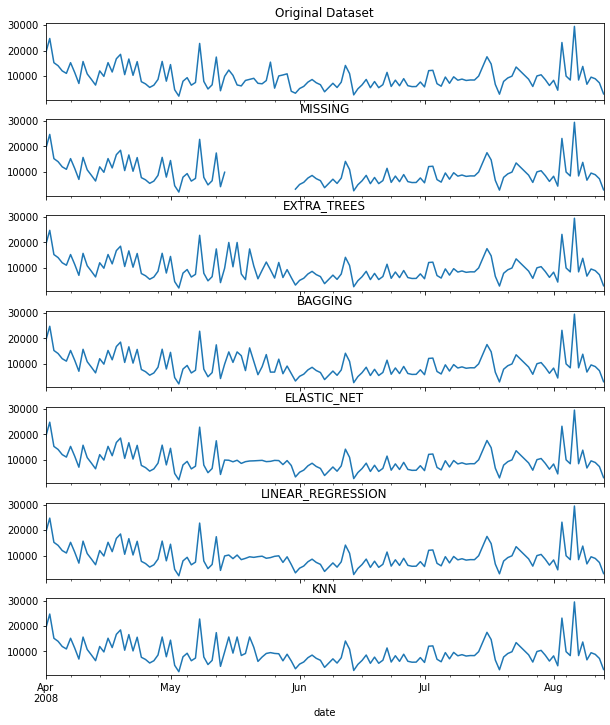

In [39]:
# Plot the results for a visual comparison between the different estimators: 

plot_dfs(clicks_original, clicks_missing, 'clicks')

In [40]:
# There's more.... using MICE
# The statsmodels library has an implementation of MICE that we can test and comparewith IterativeImputer
import statsmodels.api as sm 
from statsmodels.imputation.mice import MICE, MICEData, MICEResults
import statsmodels.api 

# create a MICEData object 
fltr = ['price', 'location', 'clicks']
mice_data = MICEData(clicks_missing[fltr], 
                     perturbation_method='gaussian')

# 20 iterations 
mice_data.update_all(n_iter=20)
mice_data.set_imputer('clicks', formula='~price + location', model_class=sm.OLS)


In [41]:
# Store the results in a new column and call it MICE. This way, we can compare the scores with results from IterativeImputer:

clicks_missing['MICE'] = mice_data.data['clicks'].values.tolist()
_ = rmse_score(clicks_original, clicks_missing, 'clicks')


RMSE for extra_trees: 1770.4816004775732
RMSE for bagging: 1558.377056498915
RMSE for elastic_net: 945.40752093431
RMSE for linear_regression: 938.9419831427184
RMSE for knn: 1336.8798392251822
RMSE for MICE: 1371.438131359978


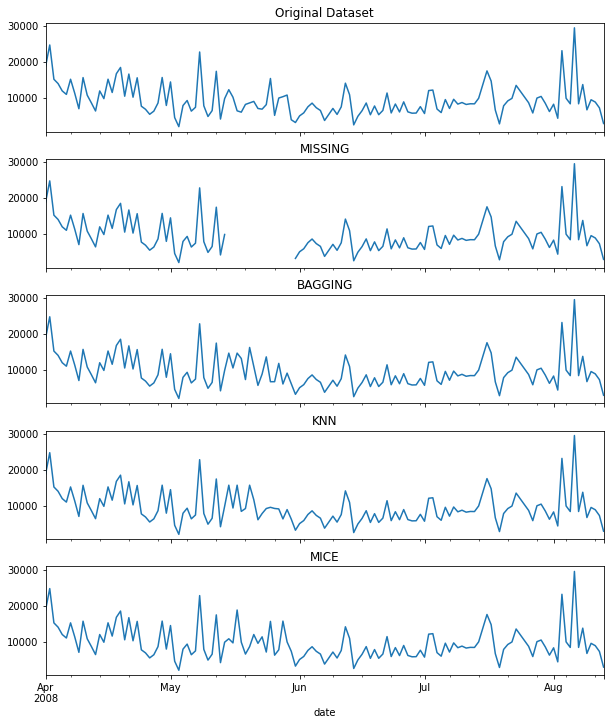

In [43]:
# Finally we can visualize the results for a final comparison. This will include some of the imputations from IterativeImputer

cols = ['clicks', 'bagging', 'knn', 'MICE']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

Overall multivariate imputation techniques generally produce better results than univariate methods. This is true when working with more complex time-series datasets in terms of the number of features and records. Though univariate imputers are more efficient in terms of speed and simplicity to interpret, there is a need to balance complexity, quality and analytical requirements

## Handling missing data with interpolation 

* The pandas library provides the DataFrame.interpolate() method for more complex univariate imputation strategies
* Linear Interpolation can be used to impute missing data by drawing a straight line between the two points surrounding the missing value 
* A polynomial interpolation, will attempt to draw a curved line between the two points
* Hence, each method will have a different mathematical operation to determine how to fill in for the missing data 


In [44]:
# Create a list of interpolation methods to be tested
interpolations = ['linear', 'quadratic', 'nearest', 'cubic']


In [45]:
# Loop through the list to run different interpolations using .interpolate() 
# - appen a new column for each interpolation output to be used for comparison

for intp in interpolations:
    co2_missing[intp] = co2_missing['co2'].interpolate(method=intp)
    clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp)



In [47]:
# There are two additional methods that it would be interesting to test: spline and polynomial
# to use these models we will need to provide an integer value for the order parameter. We can try order= 2 for the spline method, and order=5 for the polynomial method

co2_missing['spline'] = co2_missing['co2'].interpolate(method='spline', order=2)
clicks_missing['spline'] = clicks_missing['clicks'].interpolate(method='spline', order= 2)
co2_missing['polynomial'] = co2_missing['co2'].interpolate(method='polynomial', order=5)
clicks_missing['polynomial'] = clicks_missing['clicks'].interpolate(method='polynomial', order=5)


In [49]:
# Use the rmse_score function to compare the results from the different interpolation methods
_ = rmse_score(co2_original, co2_missing, 'co2')


RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684
RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614347
RMSE for nearest: 0.05385422309469095
RMSE for cubic: 0.08373627305833133
RMSE for spline: 0.1878602347541416
RMSE for polynomial: 0.06728323553134928


In [51]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')



RMSE for extra_trees: 1770.4816004775732
RMSE for bagging: 1558.377056498915
RMSE for elastic_net: 945.40752093431
RMSE for linear_regression: 938.9419831427184
RMSE for knn: 1336.8798392251822
RMSE for MICE: 1371.438131359978
RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626975
RMSE for nearest: 1706.1853705030173
RMSE for cubic: 6199.304875782831
RMSE for spline: 5222.922993448641
RMSE for polynomial: 56757.293236471276


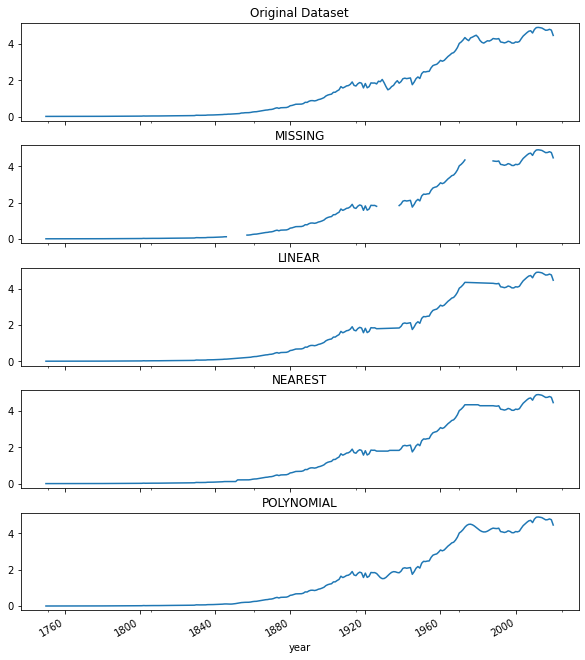

In [52]:
# Visualize the results to gain a better idea of how each interpolation worked
cols = ['co2', 'linear', 'nearest', 'polynomial']
plot_dfs(co2_original, co2_missing[cols], 'co2')


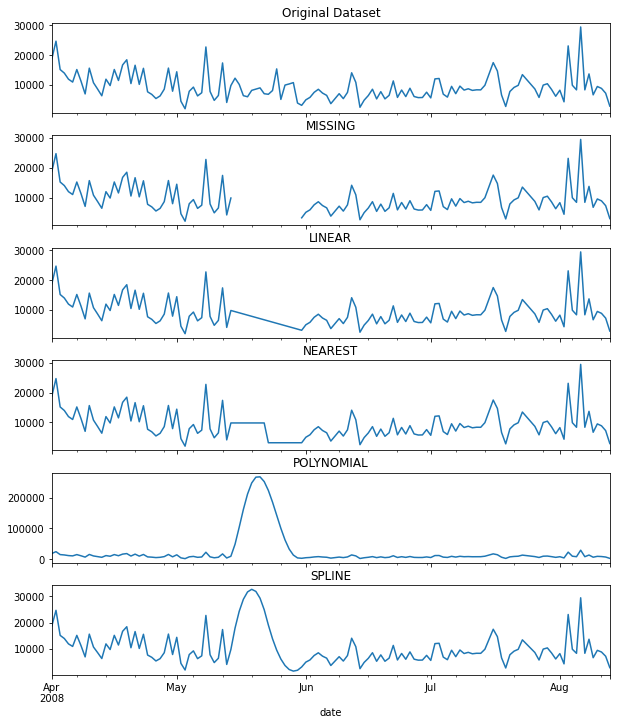

In [53]:
cols = ['clicks', 'linear', 'nearest', 'polynomial', 'spline']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

## Outlier Detection using Statistical Methods
